<a href="https://colab.research.google.com/github/KentaEDM/Machine-Learning/blob/main/Waste_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import zipfile
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import tensorflow as tf
import glob

from skimage.io import imread, imshow

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import warnings
warnings.filterwarnings('ignore')
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Load Data

In [ ]:
! chmod 600 /content/kaggle.json

In [ ]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d techsash/waste-classification-data

100% 427M/427M [00:22<00:00, 20.9MB/s]
100% 427M/427M [00:22<00:00, 19.7MB/s]


In [ ]:
#Mengekstrak gambar
zip_file = zipfile.ZipFile('/content/waste-classification-data.zip')
zip_file.extractall('/content/waste-classification-data')

Training Data

In [ ]:
# organic type
train_o = glob.glob('../content/waste-classification-data/DATASET/TRAIN/O/*.jpg')

In [ ]:
# recycle type
train_r = glob.glob('../content/waste-classification-data/DATASET/TRAIN/R/*.jpg')

In [ ]:
# Total training images 
print("Nos of training samples: {}".format(len(train_o)+len(train_r)))

Nos of training samples: 22564


Organic Type

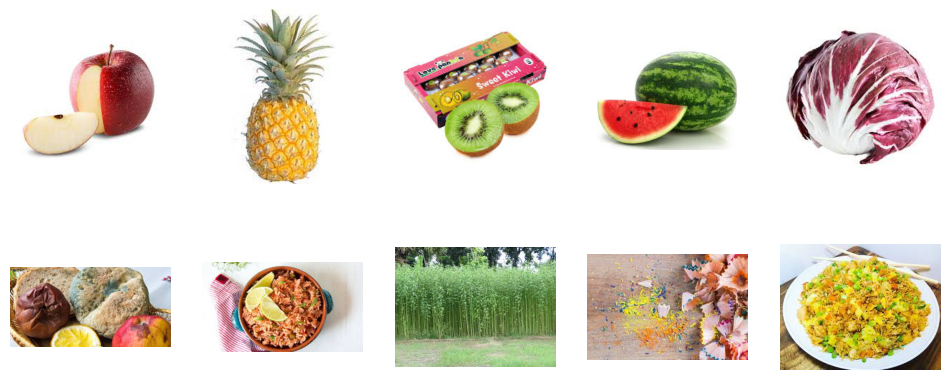

In [ ]:
plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')
img = mpimg.imread("../content/waste-classification-data/DATASET/TRAIN/O/O_20.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread("../content/waste-classification-data/DATASET/TRAIN/O/O_25.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread("../content/waste-classification-data/DATASET/TRAIN/O/O_700.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread("../content/waste-classification-data/DATASET/TRAIN/O/O_50.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread("../content/waste-classification-data/DATASET/TRAIN/O/O_1658.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 6)
sp.axis('Off')
img = mpimg.imread("../content/waste-classification-data/DATASET/TRAIN/O/O_6783.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 7)
sp.axis('Off')
img = mpimg.imread("../content/waste-classification-data/DATASET/TRAIN/O/O_11783.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 8)
sp.axis('Off')
img = mpimg.imread("../content/waste-classification-data/DATASET/TRAIN/O/O_8583.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 9)
sp.axis('Off')
img = mpimg.imread("../content/waste-classification-data/DATASET/TRAIN/O/O_9000.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 10)
sp.axis('Off')
img = mpimg.imread("../content/waste-classification-data/DATASET/TRAIN/O/O_12000.jpg")
plt.imshow(img)

Recycle Type

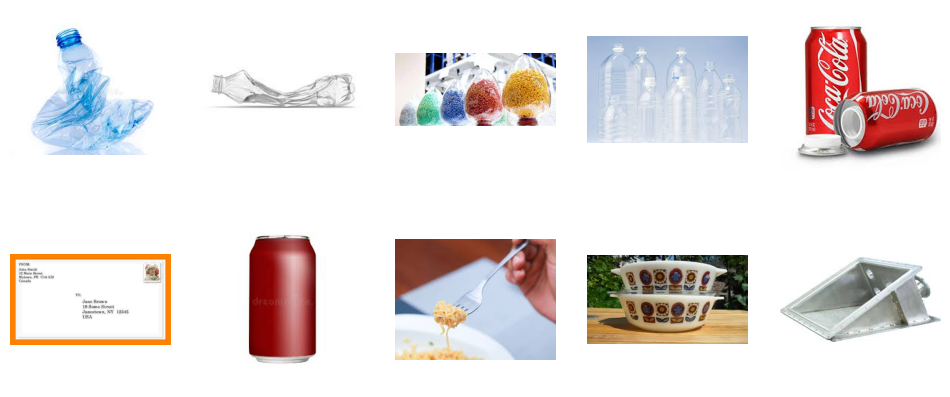

In [ ]:
plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')
img = mpimg.imread("../content/waste-classification-data/DATASET/TRAIN/R/R_20.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread("../content/waste-classification-data/DATASET/TRAIN/R/R_25.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread("../content/waste-classification-data/DATASET/TRAIN/R/R_800.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread("../content/waste-classification-data/DATASET/TRAIN/R/R_1004.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread("../content/waste-classification-data/DATASET/TRAIN/R/R_1658.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 6)
sp.axis('Off')
img = mpimg.imread("../content/waste-classification-data/DATASET/TRAIN/R/R_6700.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 7)
sp.axis('Off')
img = mpimg.imread("../content/waste-classification-data/DATASET/TRAIN/R/R_1784.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 8)
sp.axis('Off')
img = mpimg.imread("../content/waste-classification-data/DATASET/TRAIN/R/R_8580.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 9)
sp.axis('Off')
img = mpimg.imread("../content/waste-classification-data/DATASET/TRAIN/R/R_9051.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 10)
sp.axis('Off')
img = mpimg.imread("../content/waste-classification-data/DATASET/TRAIN/R/R_5000.jpg")
plt.imshow(img)

Data Augmentation

In [ ]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                   zoom_range = 0.4,
                                   rotation_range = 10,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   validation_split = 0.2)

valid_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                   validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1.0 / 255.0)

In [ ]:
# --------------------
# Flow training images in batches of 64 using train_datagen generator
# --------------------
train_dataset  = train_datagen.flow_from_directory(directory = '../content/waste-classification-data/DATASET/TRAIN',
                                                   target_size = (224,224),
                                                   class_mode = 'binary',
                                                   batch_size = 64, 
                                                   subset = 'training')
# --------------------
# Flow validation images in batches of 64 using valid_datagen generator
# --------------------
validation_dataset = valid_datagen.flow_from_directory(directory = '../content/waste-classification-data/DATASET/TRAIN',
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 64, 
                                                  subset = 'validation')

# Test Data 

test_dataset = test_datagen.flow_from_directory(directory = '../content/waste-classification-data/DATASET/TEST',
                                             target_size = (224,224),
                                             class_mode = 'binary',
                                             batch_size = 64)

Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


Model Building

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 224x224 with 3 color
    tf.keras.layers.Conv2D(filters=32,activation='relu',input_shape=(224,224,3),padding='same',kernel_size=(3,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64,activation='relu',padding='same',kernel_size=(3,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=128,activation='relu',padding='same',kernel_size=(3,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(units=512,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(units=256,activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('Organic') 
    # and 1 for the other ('Recycled')
    tf.keras.layers.Dense(units=1,activation='sigmoid'),
])

In [ ]:
#The following is the model summary of the model:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

Specifying the optimizers and compile the model

In [ ]:
monitor = EarlyStopping(monitor='val_auc', patience=2, 
                        verbose=1, mode='max',restore_best_weights=True)
# Defining Callbacks

filepath = './best_weights.hdf5'
checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_auc', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)


callback_list = [monitor, checkpoint]

# model compile
model.compile(optimizer=Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics = [tf.keras.metrics.AUC(name = 'auc')])

Model Fitting

In [ ]:
history = model.fit(train_dataset,
                              validation_data=validation_dataset,
                              epochs=5,
                              verbose=1, callbacks=callback_list)

Epoch 1/5
283/283 [==============================] - ETA: 0s - loss: 0.4745 - auc: 0.8561
Epoch 1: val_auc improved from -inf to 0.89446, saving model to ./best_weights.hdf5
283/283 [==============================] - 249s 881ms/step - loss: 0.4745 - auc: 0.8561 - val_loss: 0.4244 - val_auc: 0.8945
Epoch 2/5
283/283 [==============================] - ETA: 0s - loss: 0.4103 - auc: 0.8938
Epoch 2: val_auc improved from 0.89446 to 0.90398, saving model to ./best_weights.hdf5
283/283 [==============================] - 244s 862ms/step - loss: 0.4103 - auc: 0.8938 - val_loss: 0.4113 - val_auc: 0.9040
Epoch 3/5
283/283 [==============================] - ETA: 0s - loss: 0.3883 - auc: 0.9055
Epoch 3: val_auc did not improve from 0.90398
283/283 [==============================] - 236s 833ms/step - loss: 0.3883 - auc: 0.9055 - val_loss: 0.4146 - val_auc: 0.8972
Epoch 4/5
283/283 [==============================] - ETA: 0s - loss: 0.3725 - auc: 0.9137
Epoch 4: val_auc improved from 0.90398 to 0.9093

Model Evaluation

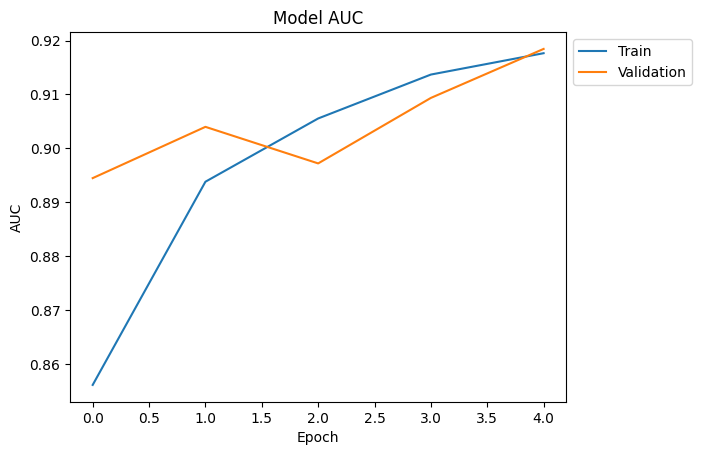

In [ ]:
# plotting model auc

plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

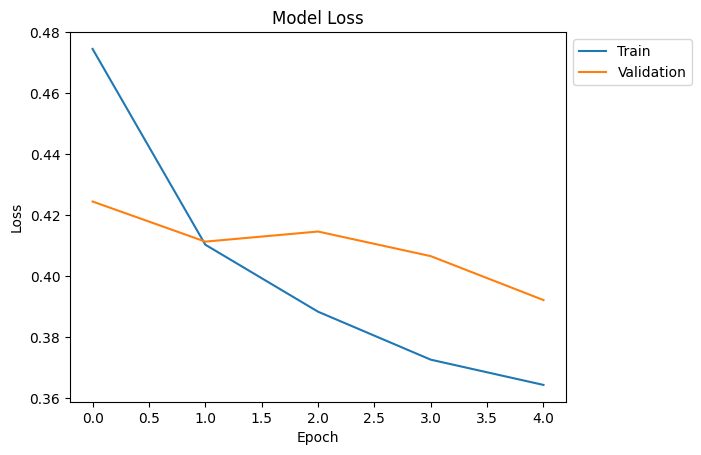

In [ ]:
# plotting model loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [ ]:
# Evaluating Loss and AUC for Test data 

model.evaluate(test_dataset)

40/40 [==============================] - 7s 164ms/step - loss: 0.3223 - auc: 0.9509


[0.3222990334033966, 0.9509234428405762]

1/1 [==============================] - 1s 891ms/step
The image belongs to Organic waste category 


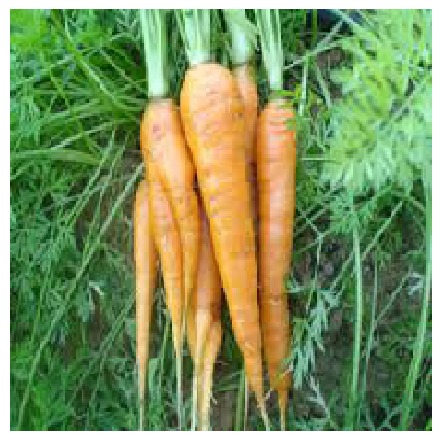

In [ ]:
# Test - ORGANIC

test_dict = test_dataset.class_indices
idc = {k:v for v,k in test_dict.items()}

img = load_img('../content/waste-classification-data/DATASET/TEST/O/O_12596.jpg', target_size=(224,224))
img = img_to_array(img)
img = img / 255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
pred = model.predict(img)

if pred[0][0] > 0.5:
    print("The image belongs to Recycle waste category")
else:
    print("The image belongs to Organic waste category ")

1/1 [==============================] - 0s 44ms/step
The image belongs to Recycle waste category


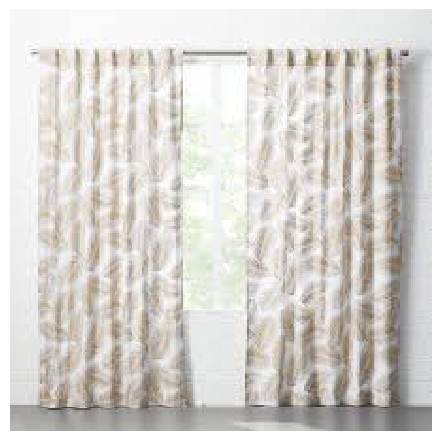

In [ ]:
# Test - RECYCLE

test_dict = test_dataset.class_indices
idc = {k:v for v,k in test_dict.items()}

img = load_img('../content/waste-classification-data/DATASET/TEST/R/R_10011.jpg', target_size=(224,224))
img = img_to_array(img)
img = img / 255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
pred = model.predict(img)

if pred[0][0] > 0.5:
    print("The image belongs to Recycle waste category")
else:
    print("The image belongs to Organic waste category ")

In [ ]:
from google.colab import files
files.download('best_weights.hdf5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>